In [20]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
import os
from tensorflow.keras.callbacks import ModelCheckpoint

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("./Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


## First Attempt : Removing an extra feature

In [21]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=['EIN', 'NAME','SPECIAL_CONSIDERATIONS'])

In [22]:
application_df.nunique()

APPLICATION_TYPE      17
AFFILIATION            6
CLASSIFICATION        71
USE_CASE               5
ORGANIZATION           4
STATUS                 2
INCOME_AMT             9
ASK_AMT             8747
IS_SUCCESSFUL          2
dtype: int64

In [23]:
app_type_counts = application_df['APPLICATION_TYPE'].value_counts()
app_type_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

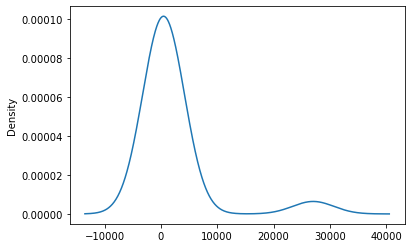

In [24]:
# Visualize the value counts of APPLICATION_TYPE
app_type_counts.plot.density()

In [25]:
# Determine which values to replace if counts are less than ...?
replace_application = list(app_type_counts[app_type_counts < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [26]:
# Look at CLASSIFICATION value counts for binning
classification_counts = application_df['CLASSIFICATION'].value_counts()
classification_counts.head(60)

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C6000       15
C1800       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C4100        6
C2400        6
C1720        6
C1257        5
C1600        5
C0           3
C2710        3
C1260        3
C1267        2
C1246        2
C1234        2
C3200        2
C1256        2
C2570        1
C1283        1
C4120        1
C2600        1
C1900        1
C2170        1
C1248        1
C3700        1
C4200        1
C2380        1
C1728        1
C8210        1
C1820        1
C2190        1
C4500        1
Name: CLASSIFICATION, dtype: int64

<AxesSubplot:ylabel='Density'>

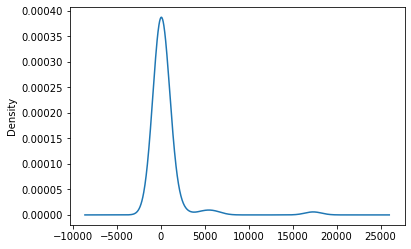

In [27]:
# Visualize the value counts of CLASSIFICATION
classification_counts.plot.density()

In [28]:
# Determine which values to replace if counts are less than ..?
replace_class = list(classification_counts[classification_counts < 1500].index)

# Replace in dataframe
for cls in replace_class:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [29]:
application_df.nunique()

APPLICATION_TYPE       9
AFFILIATION            6
CLASSIFICATION         6
USE_CASE               5
ORGANIZATION           4
STATUS                 2
INCOME_AMT             9
ASK_AMT             8747
IS_SUCCESSFUL          2
dtype: int64

In [30]:
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,142590,1


In [31]:
# Generate our categorical variable lists
application_categoricals = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_categoricals

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT']

In [32]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_categoricals]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_categoricals)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [33]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(columns=application_categoricals)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [34]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(columns=["IS_SUCCESSFUL"]).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [35]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Second Attempt : Changing Activation Functions

In [36]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  100
hidden_nodes_layer2 = 50

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="tanh"))

# Second hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))

# Second hidden layer
nn.add(
    tf.keras.layers.Dense(units=4, activation="tanh"))

# Output layer
nn.add(
    tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 100)               4200      
_________________________________________________________________
dense_9 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_10 (Dense)             (None, 4)                 204       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 5         
Total params: 9,459
Trainable params: 9,459
Non-trainable params: 0
_________________________________________________________________


In [37]:
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=4000)

# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100, callbacks=[cp_callback])

Epoch 1/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5695 - accuracy: 0.7226
Epoch 2/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5570 - accuracy: 0.7293
Epoch 3/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5544 - accuracy: 0.7304
Epoch 4/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5522 - accuracy: 0.7313: 0s - loss: 0
Epoch 5/100
772/804 [===========================>..] - ETA: 0s - loss: 0.5504 - accuracy: 0.7318
Epoch 00005: saving model to checkpoints\weights.05.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5509 - accuracy: 0.7316
Epoch 6/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5497 - accuracy: 0.7335: 0s - loss: 0.5501 - accuracy: 
Epoch 7/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5484 - accuracy: 0.7336
Epoch 8/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5470 - accuracy: 0.7348: 0s 

804/804 [==============================] - 1s 1ms/step - loss: 0.5352 - accuracy: 0.7411: 0s - loss: 0.5323 - accuracy: 0.74 - ETA: 0s - loss: 0.5319 - accuracy - ETA: 0s - loss: 0.5340 
Epoch 55/100
584/804 [====================>.........] - ETA: 0s - loss: 0.5347 - accuracy: 0.7398
Epoch 00055: saving model to checkpoints\weights.55.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5351 - accuracy: 0.7408
Epoch 56/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5350 - accuracy: 0.7411: 0s - l
Epoch 57/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5349 - accuracy: 0.7414
Epoch 58/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5347 - accuracy: 0.7412: 0s - loss: 0.5336 
Epoch 59/100
804/804 [==============================] - ETA: 0s - loss: 0.5350 - accuracy: 0.74 - 1s 1ms/step - loss: 0.5349 - accuracy: 0.7409
Epoch 60/100
526/804 [==================>...........] - ETA: 0s - loss: 0.5371 - accuracy: 

In [38]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5538 - accuracy: 0.7262
Loss: 0.5538092255592346, Accuracy: 0.7261807322502136


In [39]:
# save the module.
nn.save("AlphabetSoupCharityAttempt2.h5")

## Third Attempt : Removing a hiddent node layer, Modifing 

In [40]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  100
hidden_nodes_layer2 = 50

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="tanh"))

# Second hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))

# Second hidden layer
nn.add(
    tf.keras.layers.Dense(units=4, activation="sigmoid"))

# Output layer
nn.add(
    tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 100)               4200      
_________________________________________________________________
dense_13 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_14 (Dense)             (None, 4)                 204       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 5         
Total params: 9,459
Trainable params: 9,459
Non-trainable params: 0
_________________________________________________________________


In [41]:
# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=4000)

# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=1000, callbacks=[cp_callback])

Epoch 1/1000
804/804 [==============================] - 1s 1ms/step - loss: 0.5786 - accuracy: 0.7227
Epoch 2/1000
804/804 [==============================] - 1s 1ms/step - loss: 0.5632 - accuracy: 0.7298
Epoch 3/1000
804/804 [==============================] - 1s 1ms/step - loss: 0.5595 - accuracy: 0.7317: 0s - l
Epoch 4/1000
804/804 [==============================] - 1s 1ms/step - loss: 0.5564 - accuracy: 0.7317: 0s - loss: 0.5574 - accu
Epoch 5/1000
772/804 [===========================>..] - ETA: 0s - loss: 0.5533 - accuracy: 0.7343 ETA: 0s - loss: 0.5545 - accuracy: 
Epoch 00005: saving model to checkpoints\weights.05.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5542 - accuracy: 0.7334
Epoch 6/1000
804/804 [==============================] - 1s 1ms/step - loss: 0.5518 - accuracy: 0.7336
Epoch 7/1000
804/804 [==============================] - 1s 1ms/step - loss: 0.5501 - accuracy: 0.7340
Epoch 8/1000
804/804 [==============================] - 1s 1ms/step - loss

804/804 [==============================] - 1s 1ms/step - loss: 0.5354 - accuracy: 0.7420: 0s - loss: 0.5343 - accuracy:  - ETA: 0s - loss: 0.5333 - accura
Epoch 53/1000
804/804 [==============================] - 1s 1ms/step - loss: 0.5353 - accuracy: 0.7417: 0s - loss: 0.5308 - accuracy: 0. - ETA: 0s - loss: 0.5296 - accu
Epoch 54/1000
804/804 [==============================] - 1s 1ms/step - loss: 0.5351 - accuracy: 0.7413
Epoch 55/1000
540/804 [===================>..........] - ETA: 0s - loss: 0.5355 - accuracy: 0.7431 ETA: 0s - loss: 0.5431 - accu
Epoch 00055: saving model to checkpoints\weights.55.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5351 - accuracy: 0.7412
Epoch 56/1000
804/804 [==============================] - 1s 1ms/step - loss: 0.5350 - accuracy: 0.7412
Epoch 57/1000
804/804 [==============================] - 1s 1ms/step - loss: 0.5352 - accuracy: 0.7414
Epoch 58/1000
804/804 [==============================] - 1s 1ms/step - loss: 0.5346 - accura

804/804 [==============================] - 1s 1ms/step - loss: 0.5326 - accuracy: 0.7428
Epoch 103/1000
804/804 [==============================] - 1s 1ms/step - loss: 0.5329 - accuracy: 0.7425: 0s - loss: 0.5296 - accuracy - ETA: 0s - loss: 0.534
Epoch 104/1000
804/804 [==============================] - 1s 1ms/step - loss: 0.5325 - accuracy: 0.7426: 0s - loss: 0.5340 - accuracy - ETA: 0s - loss: 0
Epoch 105/1000
344/804 [===========>..................] - ETA: 0s - loss: 0.5312 - accuracy: 0.7442 ETA: 0s - loss: 0.5322 - accuracy: 0.
Epoch 00105: saving model to checkpoints\weights.105.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5323 - accuracy: 0.7427
Epoch 106/1000
804/804 [==============================] - 1s 1ms/step - loss: 0.5323 - accuracy: 0.7434: 0s - loss: 0.5298 - 
Epoch 107/1000
804/804 [==============================] - 1s 998us/step - loss: 0.5326 - accuracy: 0.74210s - loss: 0.5304 - 
Epoch 108/1000
804/804 [==============================] - 1s 1

804/804 [==============================] - 1s 1ms/step - loss: 0.5318 - accuracy: 0.7426
Epoch 152/1000
804/804 [==============================] - 1s 1ms/step - loss: 0.5321 - accuracy: 0.7428: 0s - loss:
Epoch 153/1000
804/804 [==============================] - 1s 1ms/step - loss: 0.5313 - accuracy: 0.7425: 0s - loss: 0.5311 
Epoch 154/1000
804/804 [==============================] - 1s 994us/step - loss: 0.5318 - accuracy: 0.74350s - loss: 0.5316 - accuracy
Epoch 155/1000
152/804 [====>.........................] - ETA: 0s - loss: 0.5286 - accuracy: 0.7479
Epoch 00155: saving model to checkpoints\weights.155.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5315 - accuracy: 0.7423
Epoch 156/1000
804/804 [==============================] - 1s 1ms/step - loss: 0.5313 - accuracy: 0.7432: 0s - loss: 0.5318 - accuracy: 
Epoch 157/1000
804/804 [==============================] - 1s 1ms/step - loss: 0.5314 - accuracy: 0.7434: 0s - loss: 0.5334 - accuracy: 0.74 - ETA: 0s - lo

804/804 [==============================] - 1s 1ms/step - loss: 0.5310 - accuracy: 0.7429: 0s - loss: 0.5331 - 
Epoch 201/1000
804/804 [==============================] - 1s 1ms/step - loss: 0.5310 - accuracy: 0.7427: 0s - l
Epoch 202/1000
804/804 [==============================] - 1s 1ms/step - loss: 0.5313 - accuracy: 0.7432: 0s - loss: 0 - ETA: 0s - loss: 0.5301 - accuracy
Epoch 203/1000
804/804 [==============================] - 1s 1ms/step - loss: 0.5310 - accuracy: 0.7421
Epoch 204/1000
746/804 [==========================>...] - ETA: 0s - loss: 0.5321 - accuracy: 0.7417
Epoch 00204: saving model to checkpoints\weights.204.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5310 - accuracy: 0.7425
Epoch 205/1000
804/804 [==============================] - 1s 1ms/step - loss: 0.5309 - accuracy: 0.7430: 0s - loss: 0.5300 - accuracy: 
Epoch 206/1000
804/804 [==============================] - 1s 1ms/step - loss: 0.5310 - accuracy: 0.7432: 0s - loss: 0.5349 - accuracy: 0

804/804 [==============================] - 1s 1ms/step - loss: 0.5305 - accuracy: 0.7430: 0s - loss: 0.5
Epoch 252/1000
804/804 [==============================] - 1s 1ms/step - loss: 0.5304 - accuracy: 0.7435: 0s - loss: 0.5322 - accura - ETA: 0s - loss: 0.5310 - accuracy: 
Epoch 253/1000
804/804 [==============================] - 1s 1000us/step - loss: 0.5305 - accuracy: 0.7422s - loss: 0.5346 - accura - ETA: 0s - loss: 0.5289 - 
Epoch 254/1000
555/804 [===================>..........] - ETA: 0s - loss: 0.5297 - accuracy: 0.7438 ETA: 0s - loss: 0.5297 - accuracy: 0. - ETA: 0s - loss: 0.5296 - accuracy: 0. - ETA: 0s - loss: 0.5288 - accuracy: 0.7447
Epoch 00254: saving model to checkpoints\weights.254.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5307 - accuracy: 0.7428
Epoch 255/1000
804/804 [==============================] - 1s 1ms/step - loss: 0.5305 - accuracy: 0.7427: 0s - loss: 0.5330 -  - ETA: 0s - loss: 0.5302 - accuracy: 
Epoch 256/1000
804/804 [========

804/804 [==============================] - 1s 1ms/step - loss: 0.5301 - accuracy: 0.7431
Epoch 299/1000
389/804 [=============>................] - ETA: 0s - loss: 0.5288 - accuracy: 0.7434
Epoch 00299: saving model to checkpoints\weights.299.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5303 - accuracy: 0.7435
Epoch 300/1000
804/804 [==============================] - 1s 1ms/step - loss: 0.5303 - accuracy: 0.7430: 0s - loss: 0.5327 - accuracy: 0. - ETA: 0s - loss: 0.5301 - ac
Epoch 301/1000
804/804 [==============================] - 1s 1ms/step - loss: 0.5303 - accuracy: 0.7437: 0s - loss: 0.5362 -  - ETA: 0s - loss: 0.5323 - accuracy
Epoch 302/1000
804/804 [==============================] - 1s 1ms/step - loss: 0.5306 - accuracy: 0.7438: 0s - loss: 0.5299 - accura
Epoch 303/1000
804/804 [==============================] - 1s 1ms/step - loss: 0.5303 - accuracy: 0.7435
Epoch 304/1000
388/804 [=============>................] - ETA: 1s - loss: 0.5336 - accuracy: 0.743

804/804 [==============================] - 1s 1ms/step - loss: 0.5301 - accuracy: 0.7434
Epoch 350/1000
804/804 [==============================] - 1s 1ms/step - loss: 0.5303 - accuracy: 0.7435: 0s - loss: 0.5334 -  - ETA: 0s - loss: 0.5316 - accuracy
Epoch 351/1000
804/804 [==============================] - 1s 1ms/step - loss: 0.5300 - accuracy: 0.7438: 0s - loss: 0.5289 - 
Epoch 352/1000
804/804 [==============================] - 1s 1ms/step - loss: 0.5302 - accuracy: 0.7435
Epoch 353/1000
804/804 [==============================] - 1s 1ms/step - loss: 0.5304 - accuracy: 0.7433: 0s - loss:
Epoch 354/1000
165/804 [=====>........................] - ETA: 0s - loss: 0.5391 - accuracy: 0.7326
Epoch 00354: saving model to checkpoints\weights.354.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5304 - accuracy: 0.7431: 0s - loss: 0.5319 - accu
Epoch 355/1000
804/804 [==============================] - 1s 1ms/step - loss: 0.5304 - accuracy: 0.7432
Epoch 356/1000
804/804 [==

Epoch 403/1000
746/804 [==========================>...] - ETA: 0s - loss: 0.5293 - accuracy: 0.7442 ETA: 0s - los
Epoch 00403: saving model to checkpoints\weights.403.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5297 - accuracy: 0.7435
Epoch 404/1000
804/804 [==============================] - 1s 1ms/step - loss: 0.5300 - accuracy: 0.7437
Epoch 405/1000
804/804 [==============================] - 1s 1ms/step - loss: 0.5300 - accuracy: 0.7438
Epoch 406/1000
804/804 [==============================] - 1s 1ms/step - loss: 0.5298 - accuracy: 0.7435
Epoch 407/1000
804/804 [==============================] - 1s 1ms/step - loss: 0.5301 - accuracy: 0.7432
Epoch 408/1000
771/804 [===========================>..] - ETA: 0s - loss: 0.5291 - accuracy: 0.7443
Epoch 00408: saving model to checkpoints\weights.408.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5297 - accuracy: 0.7439
Epoch 409/1000
804/804 [==============================] - 2s 2ms/step - loss

804/804 [==============================] - 1s 1ms/step - loss: 0.5298 - accuracy: 0.7432: 0s - loss: 0.5305 - accura
Epoch 451/1000
804/804 [==============================] - 1s 1ms/step - loss: 0.5298 - accuracy: 0.7437: 0s - loss: 0
Epoch 452/1000
804/804 [==============================] - 1s 1ms/step - loss: 0.5295 - accuracy: 0.7433: 0s - loss: 0.5289 - accuracy: 0. - ETA: 0s - loss: 0.5284 - accuracy: 0. - ETA: 0s - loss: 0.5294 -  - ETA: 0s - loss: 0.5293 - accuracy: 0.74
Epoch 453/1000
578/804 [====================>.........] - ETA: 0s - loss: 0.5284 - accuracy: 0.7438
Epoch 00453: saving model to checkpoints\weights.453.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5296 - accuracy: 0.7431
Epoch 454/1000
804/804 [==============================] - 2s 2ms/step - loss: 0.5298 - accuracy: 0.7437
Epoch 455/1000
804/804 [==============================] - 1s 1ms/step - loss: 0.5298 - accuracy: 0.7436
Epoch 456/1000
804/804 [==============================] - 1s 1

804/804 [==============================] - 1s 1ms/step - loss: 0.5297 - accuracy: 0.7431: 0s - loss: 0.5298 - accuracy: 0.74
Epoch 504/1000
804/804 [==============================] - 1s 1ms/step - loss: 0.5296 - accuracy: 0.7432: 0s - loss: 0.5263 -  - ETA: 0s - loss: 0.5291 - accuracy: 0.74 - ETA: 0s - loss: 0.5293 - accuracy: 
Epoch 505/1000
804/804 [==============================] - 1s 1ms/step - loss: 0.5296 - accuracy: 0.7434: 0s - loss: 0.5324 - accura - ETA: 0s - loss: 0.5253 - accuracy: 0.74 - ETA: 0s - loss: 0.526
Epoch 506/1000
804/804 [==============================] - 1s 1ms/step - loss: 0.5296 - accuracy: 0.7434
Epoch 507/1000
804/804 [==============================] - 1s 1ms/step - loss: 0.5294 - accuracy: 0.7441: 0s - loss: 0.5289 - accuracy - ETA: 0s - loss: 0.5301 - accuracy:  - ETA: 0s - loss: 0.5296 - accuracy: 0.74
Epoch 508/1000
347/804 [===========>..................] - ETA: 0s - loss: 0.5294 - accuracy: 0.7420
Epoch 00508: saving model to checkpoints\weights.508.

804/804 [==============================] - 1s 1ms/step - loss: 0.5290 - accuracy: 0.7436: 0s - loss: 0.5344 - accuracy:  - ETA: 0s - loss: 0
Epoch 556/1000
804/804 [==============================] - 1s 1ms/step - loss: 0.5289 - accuracy: 0.7436: 0s - loss: 0.5350 - accura - ETA: 0s - loss: 0.5295 - ac
Epoch 557/1000
804/804 [==============================] - 1s 1ms/step - loss: 0.5292 - accuracy: 0.7437: 0s - loss:
Epoch 558/1000
146/804 [====>.........................] - ETA: 0s - loss: 0.5340 - accuracy: 0.7427
Epoch 00558: saving model to checkpoints\weights.558.hdf5
804/804 [==============================] - ETA: 0s - loss: 0.5282 - accuracy: 0.7449 ETA: 0s - loss: 0.5216 -  - 1s 1ms/step - loss: 0.5293 - accuracy: 0.7441
Epoch 559/1000
804/804 [==============================] - 1s 1ms/step - loss: 0.5292 - accuracy: 0.7441
Epoch 560/1000
804/804 [==============================] - 1s 1ms/step - loss: 0.5292 - accuracy: 0.7430
Epoch 561/1000
804/804 [==============================] 

804/804 [==============================] - 1s 1ms/step - loss: 0.5289 - accuracy: 0.7442: 0s - loss: 0.5294 - accura
Epoch 604/1000
804/804 [==============================] - 1s 1ms/step - loss: 0.5292 - accuracy: 0.7427
Epoch 605/1000
804/804 [==============================] - 1s 1ms/step - loss: 0.5292 - accuracy: 0.7436: 0s - loss: 0.5303 - accuracy: 
Epoch 606/1000
804/804 [==============================] - 1s 1ms/step - loss: 0.5294 - accuracy: 0.7432: 0s - loss: 0.5324 - accuracy: 0. - ETA: 0s - loss: 0.5
Epoch 607/1000
766/804 [===========================>..] - ETA: 0s - loss: 0.5288 - accuracy: 0.7448
Epoch 00607: saving model to checkpoints\weights.607.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5293 - accuracy: 0.7441
Epoch 608/1000
804/804 [==============================] - 1s 1ms/step - loss: 0.5293 - accuracy: 0.7435
Epoch 609/1000
804/804 [==============================] - 1s 1ms/step - loss: 0.5297 - accuracy: 0.7438
Epoch 610/1000
804/804 [====

804/804 [==============================] - 1s 1ms/step - loss: 0.5291 - accuracy: 0.7438
Epoch 653/1000
804/804 [==============================] - 1s 1ms/step - loss: 0.5291 - accuracy: 0.7439
Epoch 654/1000
804/804 [==============================] - 1s 1ms/step - loss: 0.5288 - accuracy: 0.7441
Epoch 655/1000
804/804 [==============================] - 1s 1ms/step - loss: 0.5288 - accuracy: 0.7438: 0s - los
Epoch 656/1000
804/804 [==============================] - 1s 1ms/step - loss: 0.5292 - accuracy: 0.7434: 0s - loss: 0.5326 - accuracy: 0.74 - ETA: 0s - loss: 0.5324 - accura
Epoch 657/1000
543/804 [===================>..........] - ETA: 0s - loss: 0.5282 - accuracy: 0.7446 ETA: 0s - loss: 0.5225 - accura
Epoch 00657: saving model to checkpoints\weights.657.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5292 - accuracy: 0.7438
Epoch 658/1000
804/804 [==============================] - 1s 1ms/step - loss: 0.5288 - accuracy: 0.7430: 0s - loss: 0.5269 - accuracy:  

804/804 [==============================] - 1s 1ms/step - loss: 0.5289 - accuracy: 0.7436: 0s - loss: 0.5298 - accuracy: 0.
Epoch 705/1000
804/804 [==============================] - 1s 1ms/step - loss: 0.5288 - accuracy: 0.7442: 0s - loss: 0.5267 - accuracy:  - ETA: 0s - loss: 0.5275 - accuracy: 0.74 - ETA: 0s - loss: 0.5274 - accura
Epoch 706/1000
804/804 [==============================] - 1s 1ms/step - loss: 0.5287 - accuracy: 0.7443: 0s - loss: 0.5281 - accuracy: 0.74
Epoch 707/1000
336/804 [===========>..................] - ETA: 0s - loss: 0.5288 - accuracy: 0.7419
Epoch 00707: saving model to checkpoints\weights.707.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5288 - accuracy: 0.7439
Epoch 708/1000
804/804 [==============================] - 1s 1ms/step - loss: 0.5290 - accuracy: 0.7444: 0s - loss: 0.5317  - ETA: 0s - loss: 0.5272 - accura
Epoch 709/1000
804/804 [==============================] - 1s 1ms/step - loss: 0.5287 - accuracy: 0.7441: 0s - loss: 0
Ep

804/804 [==============================] - 1s 1ms/step - loss: 0.5285 - accuracy: 0.7442
Epoch 755/1000
804/804 [==============================] - 1s 1ms/step - loss: 0.5284 - accuracy: 0.7434: 0s -
Epoch 756/1000
804/804 [==============================] - 1s 1ms/step - loss: 0.5284 - accuracy: 0.7441
Epoch 757/1000
151/804 [====>.........................] - ETA: 0s - loss: 0.5293 - accuracy: 0.7436
Epoch 00757: saving model to checkpoints\weights.757.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5287 - accuracy: 0.7437
Epoch 758/1000
804/804 [==============================] - 1s 1ms/step - loss: 0.5285 - accuracy: 0.7440: 0s - los
Epoch 759/1000
804/804 [==============================] - 1s 1ms/step - loss: 0.5289 - accuracy: 0.7444: 0s - loss: 0.5289 - accuracy: 0.74
Epoch 760/1000
804/804 [==============================] - 1s 1ms/step - loss: 0.5286 - accuracy: 0.7443
Epoch 761/1000
804/804 [==============================] - 1s 1ms/step - loss: 0.5287 - accur

739/804 [==========================>...] - ETA: 0s - loss: 0.5293 - accuracy: 0.7438
Epoch 00806: saving model to checkpoints\weights.806.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5288 - accuracy: 0.7442
Epoch 807/1000
804/804 [==============================] - 1s 1ms/step - loss: 0.5283 - accuracy: 0.7449: 0s - loss:
Epoch 808/1000
804/804 [==============================] - 1s 1ms/step - loss: 0.5287 - accuracy: 0.7444
Epoch 809/1000
804/804 [==============================] - 1s 1ms/step - loss: 0.5284 - accuracy: 0.7434
Epoch 810/1000
804/804 [==============================] - 1s 2ms/step - loss: 0.5283 - accuracy: 0.7441
Epoch 811/1000
753/804 [===========================>..] - ETA: 0s - loss: 0.5277 - accuracy: 0.7448
Epoch 00811: saving model to checkpoints\weights.811.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5284 - accuracy: 0.7442
Epoch 812/1000
804/804 [==============================] - 1s 1ms/step - loss: 0.5291 - accura

804/804 [==============================] - 1s 1ms/step - loss: 0.5283 - accuracy: 0.7448: 0s - loss: 0.5260 - accuracy: 0. - ETA: 0s - loss: 0.5282 - accuracy: 0.
Epoch 861/1000
546/804 [===================>..........] - ETA: 0s - loss: 0.5282 - accuracy: 0.7463 ETA: 0s - loss: 0.5321 - accu - ETA: 0s - loss: 0.5279 - accuracy: 0.74
Epoch 00861: saving model to checkpoints\weights.861.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5283 - accuracy: 0.7446: 0s - loss: 0.5277 - accuracy
Epoch 862/1000
804/804 [==============================] - 1s 1ms/step - loss: 0.5284 - accuracy: 0.7444
Epoch 863/1000
804/804 [==============================] - 1s 1000us/step - loss: 0.5287 - accuracy: 0.7450s - loss: 0.5282 - accura
Epoch 864/1000
804/804 [==============================] - 1s 1ms/step - loss: 0.5290 - accuracy: 0.7444: 0s - loss: 0.5279 - ac - ETA: 0s - loss: 0.5244 - 
Epoch 865/1000
804/804 [==============================] - 1s 1ms/step - loss: 0.5290 - accuracy:

804/804 [==============================] - 1s 1ms/step - loss: 0.5283 - accuracy: 0.7442
Epoch 907/1000
804/804 [==============================] - 1s 1ms/step - loss: 0.5283 - accuracy: 0.7444
Epoch 908/1000
804/804 [==============================] - 1s 1ms/step - loss: 0.5282 - accuracy: 0.7446: 0s - loss: 0.5274 -  - ETA: 0s - loss: 0.5277 - accuracy: 0.74
Epoch 909/1000
804/804 [==============================] - 1s 1ms/step - loss: 0.5279 - accuracy: 0.7443: 0s - l
Epoch 910/1000
804/804 [==============================] - 1s 1ms/step - loss: 0.5277 - accuracy: 0.7449
Epoch 911/1000
336/804 [===========>..................] - ETA: 0s - loss: 0.5319 - accuracy: 0.7412 ETA: 0s - loss: 0.5170 - accuracy
Epoch 00911: saving model to checkpoints\weights.911.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5281 - accuracy: 0.7445: 0s - loss: 0.5283 - accuracy: 0.74
Epoch 912/1000
804/804 [==============================] - 1s 1ms/step - loss: 0.5284 - accuracy: 0.7444: 0

135/804 [====>.........................] - ETA: 0s - loss: 0.5202 - accuracy: 0.7470
Epoch 00961: saving model to checkpoints\weights.961.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5286 - accuracy: 0.7430
Epoch 962/1000
804/804 [==============================] - 1s 1ms/step - loss: 0.5279 - accuracy: 0.7446
Epoch 963/1000
804/804 [==============================] - 1s 1ms/step - loss: 0.5281 - accuracy: 0.7443
Epoch 964/1000
804/804 [==============================] - 1s 1ms/step - loss: 0.5280 - accuracy: 0.7444: 0s - loss: 0.5510 - accuracy: 0. - ETA: 0s - loss: 0.5441 - accura - ETA: 0s - loss: 0.530
Epoch 965/1000
804/804 [==============================] - 1s 1ms/step - loss: 0.5276 - accuracy: 0.7449
Epoch 966/1000
139/804 [====>.........................] - ETA: 0s - loss: 0.5380 - accuracy: 0.7370 ETA: 0s - loss: 0.5252 - accuracy: 0.
Epoch 00966: saving model to checkpoints\weights.966.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0

In [43]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5647 - accuracy: 0.7266
Loss: 0.5647382736206055, Accuracy: 0.7266472578048706


In [44]:
# save the module.
nn.save("AlphabetSoupCharityAttempt3.h5")